#### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import yaml
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import pickle

#### Open file

In [3]:
with open('../params.yaml') as file:
    config = yaml.safe_load(file)

In [4]:
data = pd.read_csv(config['data']['clean'])
data

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
0,P0,None,False,True,True,True,False,True,False,False,Negative
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive
24998,P24998,Swollen Lymph Nodes,False,True,False,True,True,True,False,False,Negative


#### Filtering out patients who testet positive for monkeypox 

In [5]:
positive = data[data['monkeypox'] == 'Positive']
positive

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
1,P1,Fever,True,False,True,True,False,False,True,False,Positive
2,P2,Fever,False,True,True,False,False,False,True,False,Positive
3,P3,None,True,False,False,False,True,True,True,False,Positive
4,P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive
6,P6,Fever,False,True,False,False,False,False,True,False,Positive
...,...,...,...,...,...,...,...,...,...,...,...
24994,P24994,Fever,False,True,True,False,False,False,True,True,Positive
24995,P24995,None,True,True,False,True,True,False,False,True,Positive
24996,P24996,Fever,False,True,True,False,True,True,True,True,Positive
24997,P24997,None,True,True,False,False,True,True,False,False,Positive


In [6]:
print(f"Summary of the Dataset for patients who tested positive :")
positive.describe().style.set_properties(**{"background-color": "#5D94E3","color":"#F7F7F7","border": "1.5px solid black"})

Summary of the Dataset for patients who tested positive :


,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
count,15909,15909,15909,15909,15909,15909,15909,15909,15909,15909,15909
unique,15909,4,2,2,2,2,2,2,2,2,1
top,P1,Fever,True,True,True,True,True,True,True,True,Positive
freq,1,4780,8702,8370,8398,8258,8197,8055,8887,8662,15909


#### Filtering out patients who testet negative for monkeypox 

In [7]:
negative = data[data['monkeypox'] == 'Negative']
negative

,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
0,P0,None,False,True,True,True,False,True,False,False,Negative
5,P5,Swollen Lymph Nodes,False,True,False,False,False,False,False,False,Negative
9,P9,Fever,False,False,True,True,True,False,True,False,Negative
10,P10,Muscle Aches and Pain,False,True,True,True,True,True,False,True,Negative
11,P11,Swollen Lymph Nodes,True,True,False,False,True,False,False,False,Negative
...,...,...,...,...,...,...,...,...,...,...,...
24983,P24983,Muscle Aches and Pain,False,True,True,True,False,False,True,True,Negative
24988,P24988,Muscle Aches and Pain,True,True,False,False,False,False,True,False,Negative
24990,P24990,Muscle Aches and Pain,False,False,True,True,False,False,True,False,Negative
24992,P24992,None,True,False,True,False,False,False,False,True,Negative


In [8]:
print(f"Summary of the Dataset for patients who tested negative :")
negative.describe().style.set_properties(**{"background-color": "#5D94E3","color":"#F7F7F7","border": "1.5px solid black"})

Summary of the Dataset for patients who tested negative :


,patient_id,systemic_illness,rectal_pain,sore_throat,penile_oedema,oral_lesions,solitary_lesion,swollen_tonsils,hiv_infection,sexually_transmitted_infection,monkeypox
count,9091,9091,9091,9091,9091,9091,9091,9091,9091,9091,9091
unique,9091,4,2,2,2,2,2,2,2,2,1
top,P0,Muscle Aches and Pain,False,False,False,False,False,False,False,False,Negative
freq,1,2926,5448,4907,4877,4863,4761,4613,5394,5307,9091


#### Custom Palette For Visualization



In [9]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#D4C8BA","figure.facecolor":"#D4C8BA"})
sns.set_context("poster",font_scale = .7)

#### Distribution plots for patients who tested positive for monkeypox, and those patients that tested negative


#### `Systemic Illness`: Fever and swollen lymph nodes seem to be a clear indicator for monkeypox. Muscle aches and pain also increase about 10% in comparison to patients who tested negative.

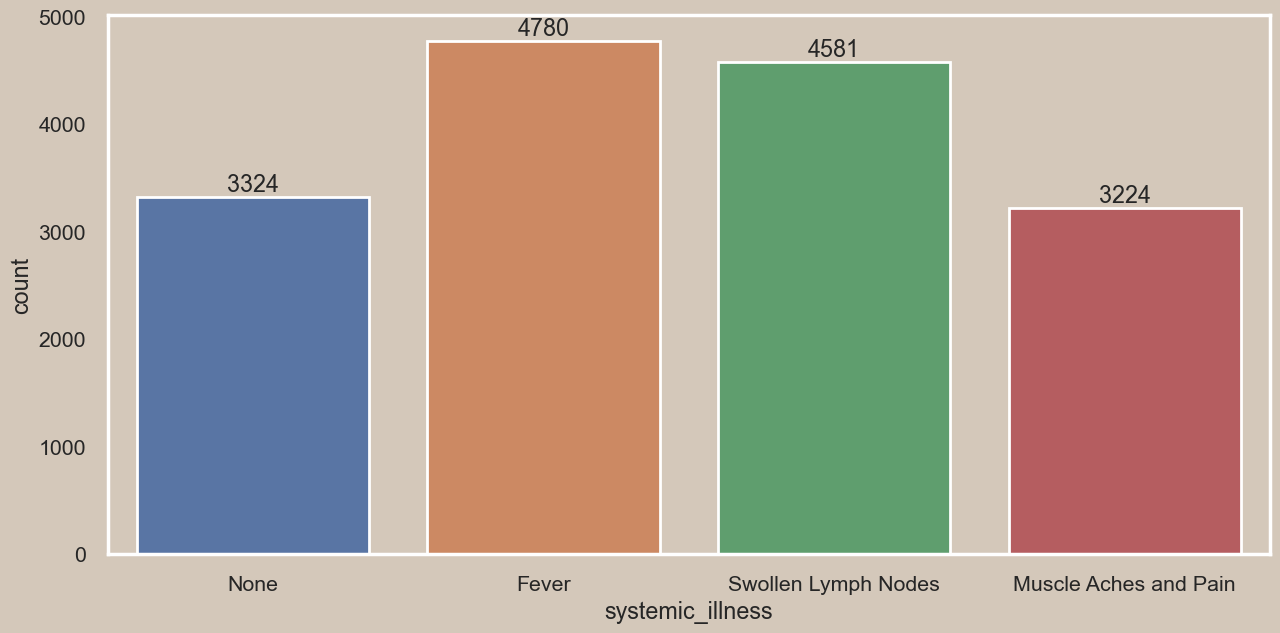

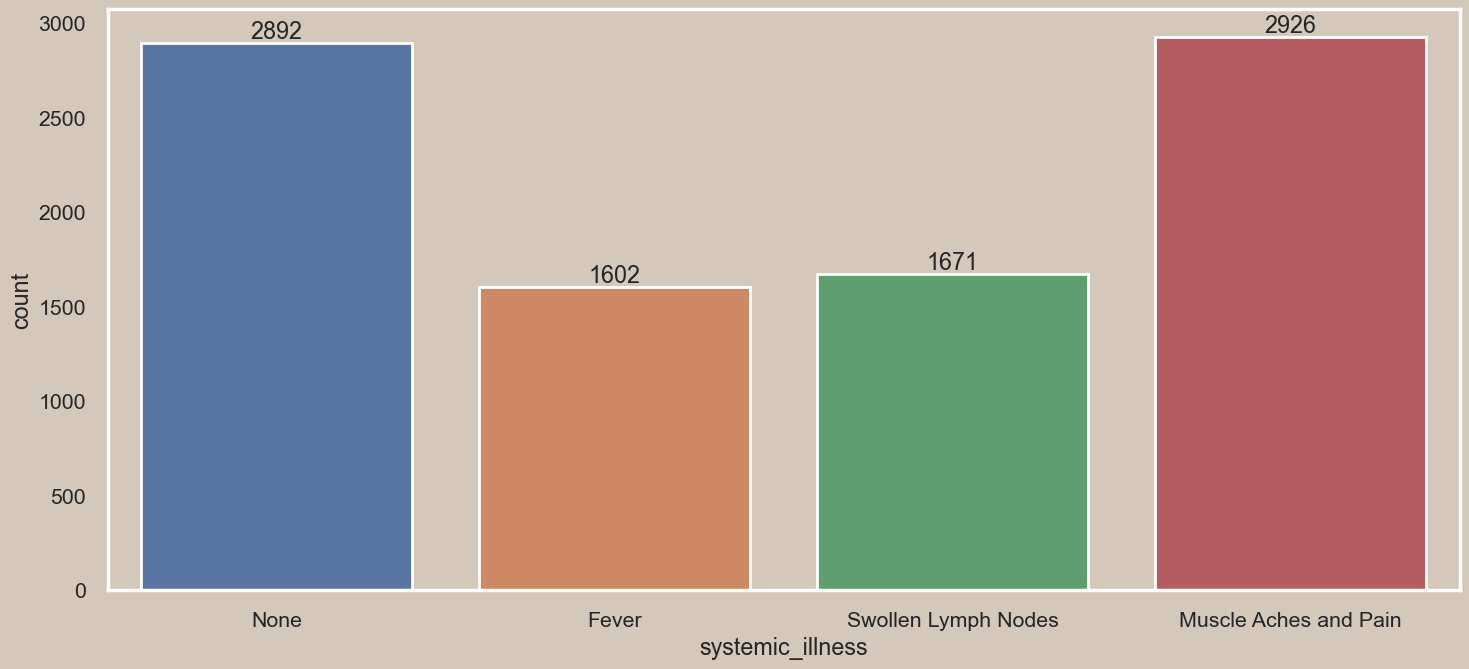

In [10]:
sup_order = ['None','Fever','Swollen Lymph Nodes','Muscle Aches and Pain']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='systemic_illness', data=positive, order = sup_order)
sx.bar_label(sx.containers[0], label_type='edge')
sx.grid(axis='y')
plt.savefig("../plots/systemic_illness_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='systemic_illness', data=negative, order = sup_order)
sx.bar_label(sx.containers[0], label_type='edge')
sx.grid(axis='y')
plt.tight_layout()
plt.savefig("../plots/systemic_illness_neg.png", dpi=300)
plt.show()

#### `Rectal pain`: The majority of the patients who tested positive, suffer from rectal pain.

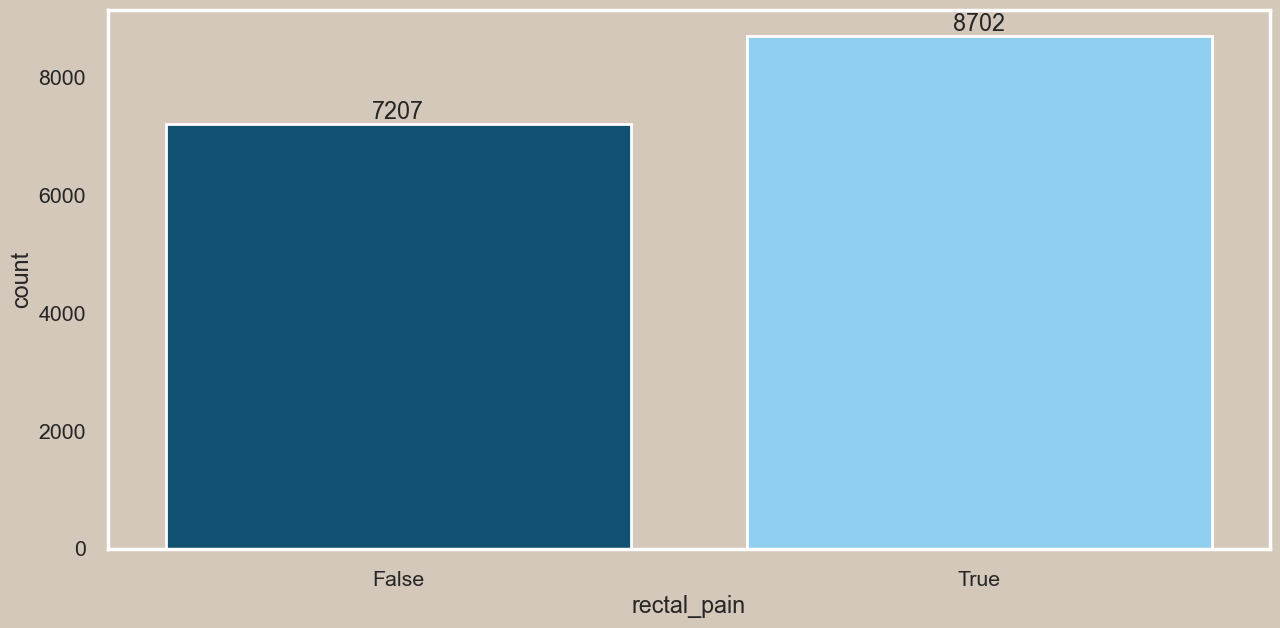

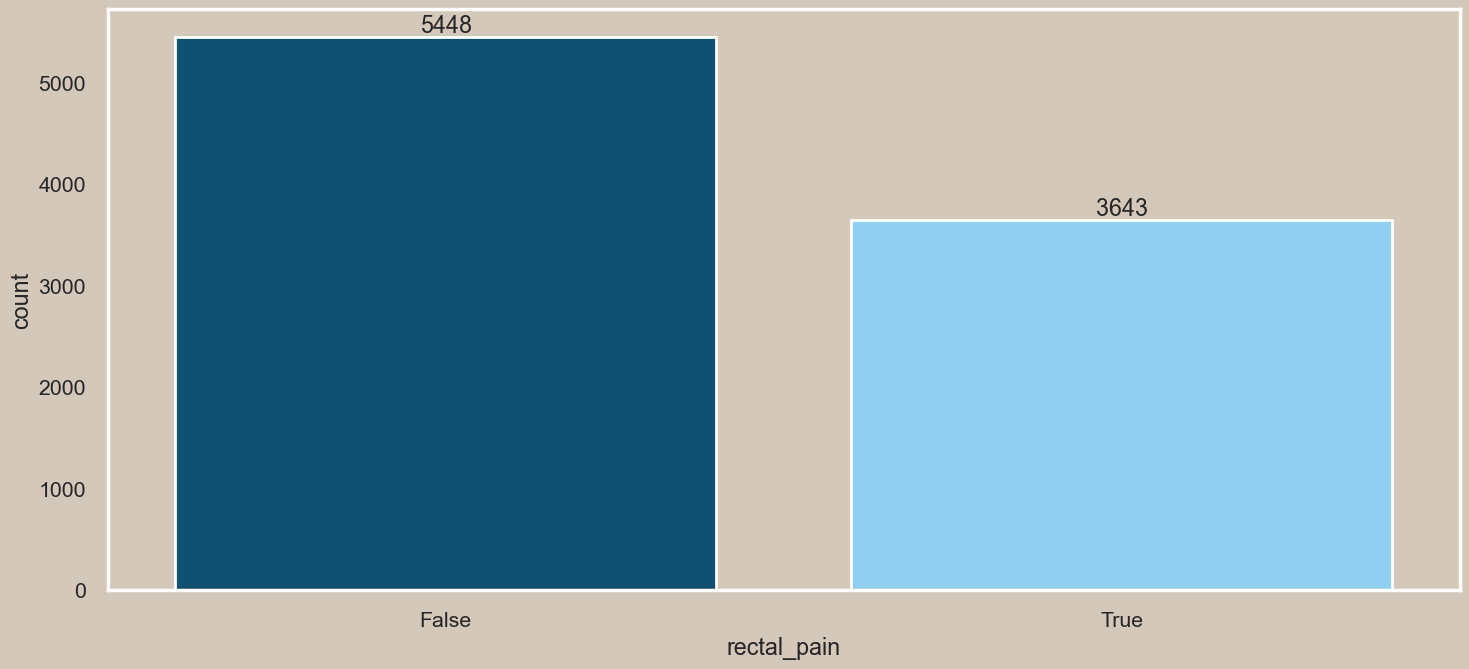

In [18]:
palette = ['#005580', '#80d4ff']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='rectal_pain', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/rectal_pain_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='rectal_pain', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/rectal_pain_neg.png", dpi=300)
plt.show()

#### `Sore Throat`: About 2/3 of the  patients that have a sore throat, have tested positive for monkeypox.

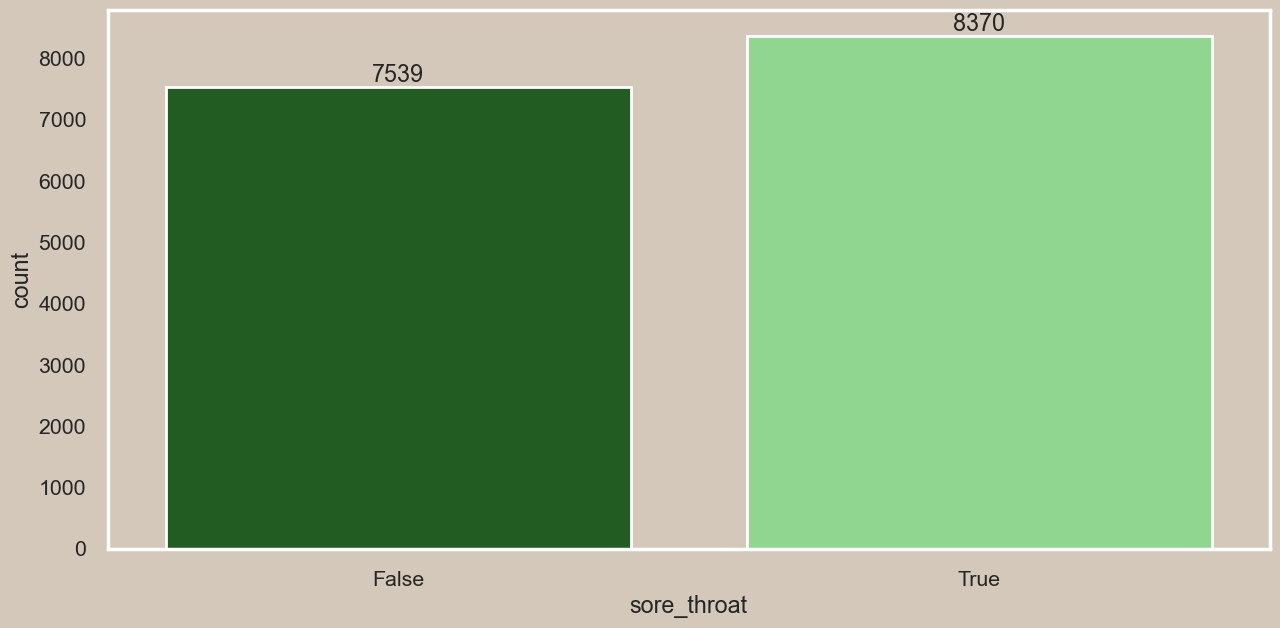

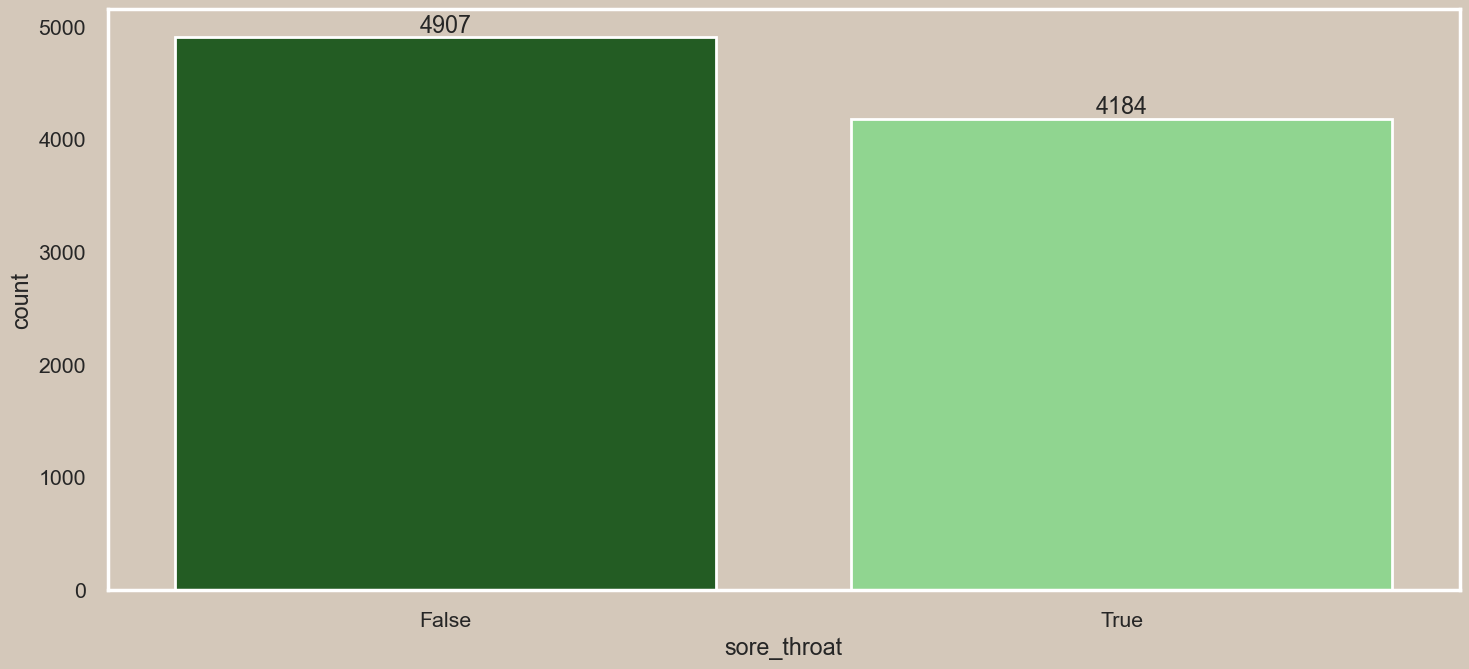

In [19]:
palette = ['#196619', '#84e184']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='sore_throat', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/sore_throat_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='sore_throat', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/sore_throat_neg.png", dpi=300)
plt.show()

#### `Penile Oedema`: A majority of the patients tested positive develop penile oedema

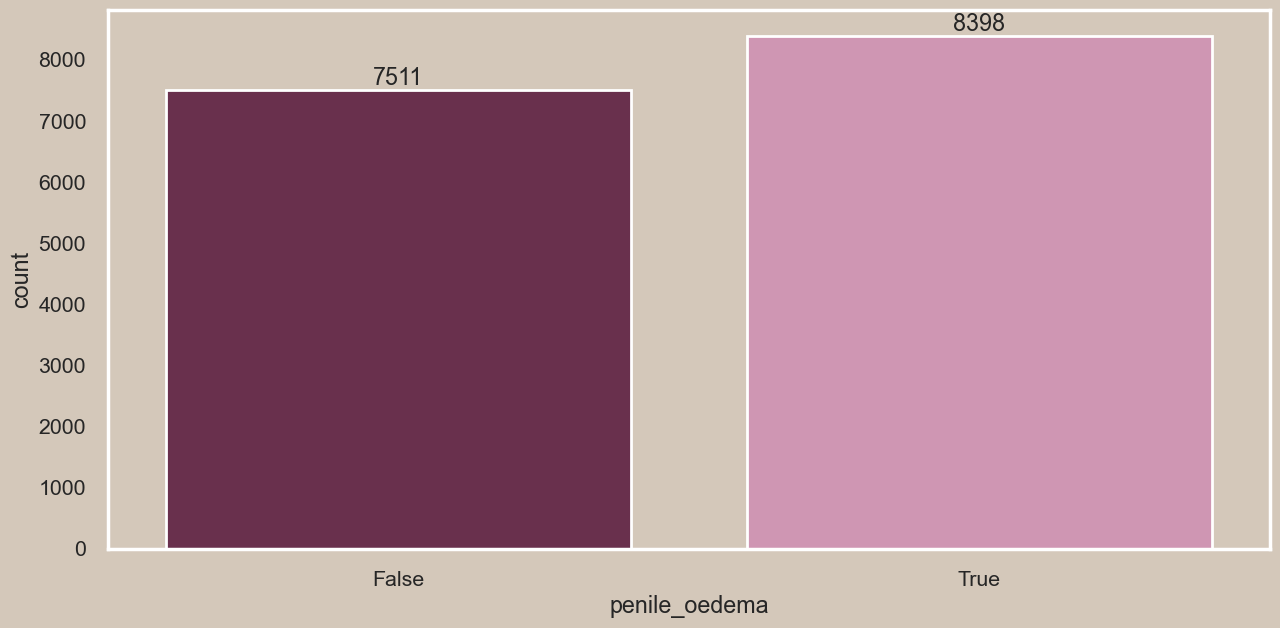

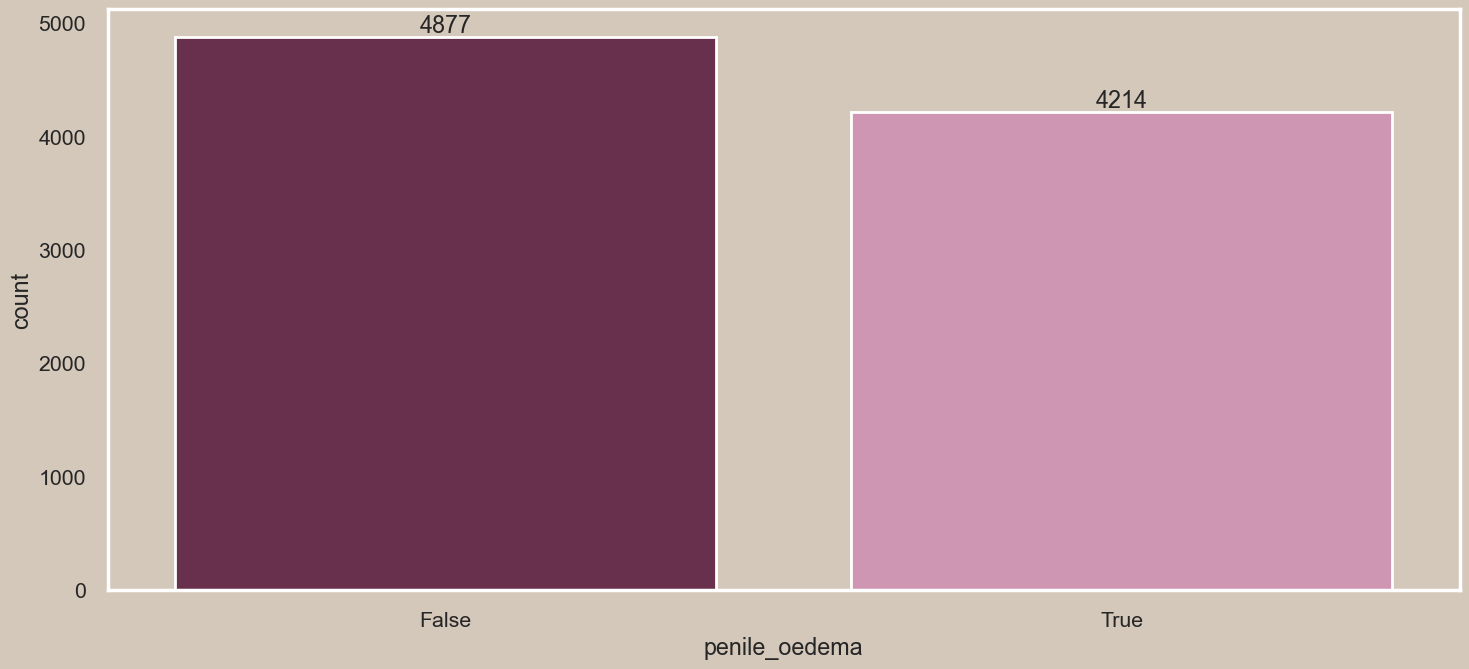

In [21]:
palette = ['#73264d', '#d98cb3']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='penile_oedema', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/penile_oedema_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='penile_oedema', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/penile_oedema_neg.png", dpi=300)
plt.show()

#### `Oral Lesions`: A slight majority of the patients tested positive develop oral lesions

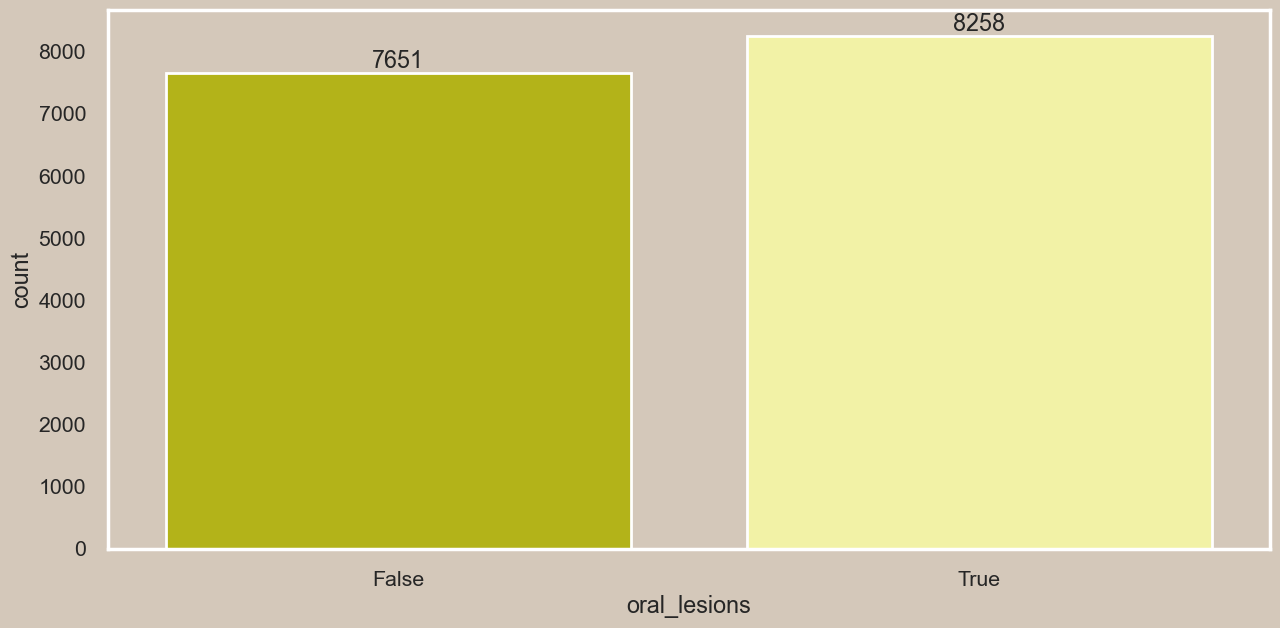

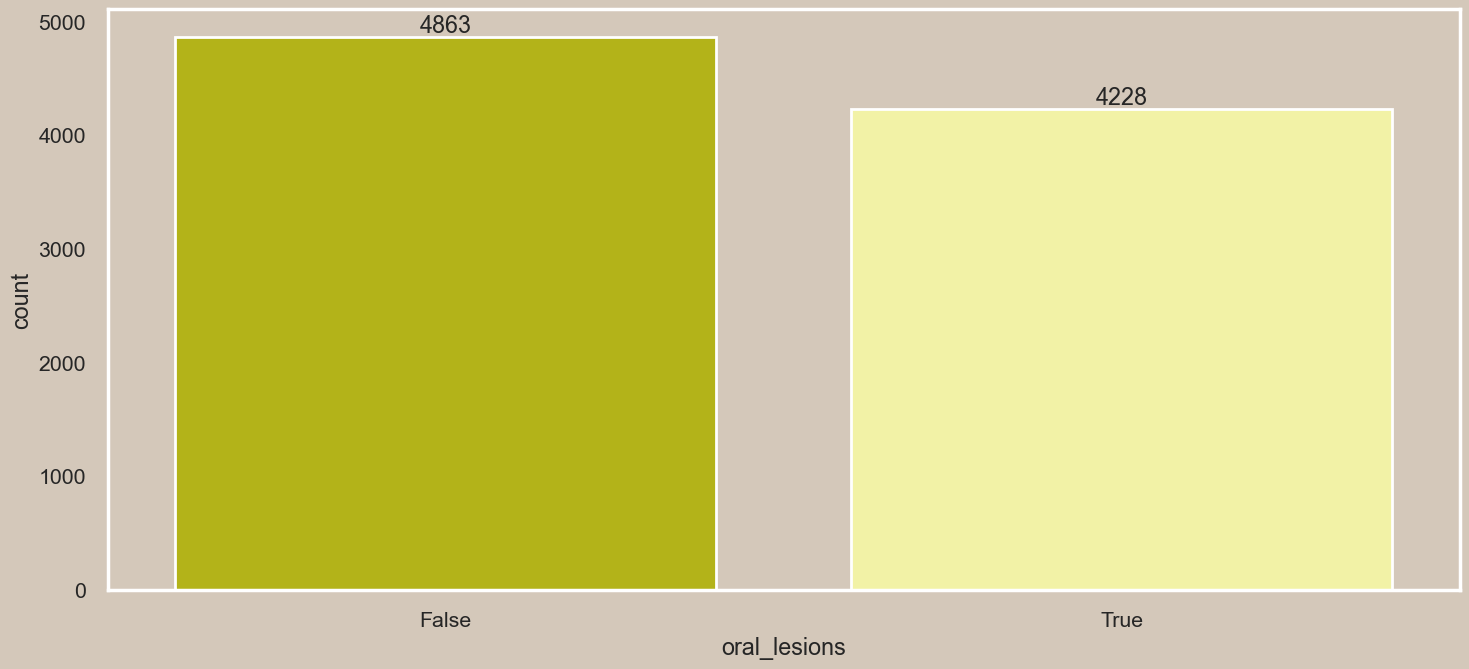

In [22]:
palette = ['#cccc00', '#ffff99']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='oral_lesions', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/oral_lesions_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='oral_lesions', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/oral_lesions_neg.png", dpi=300)
plt.show()

#### `Solitary Lesion`: A slight majority of monkey pox patients develop solitary lesions

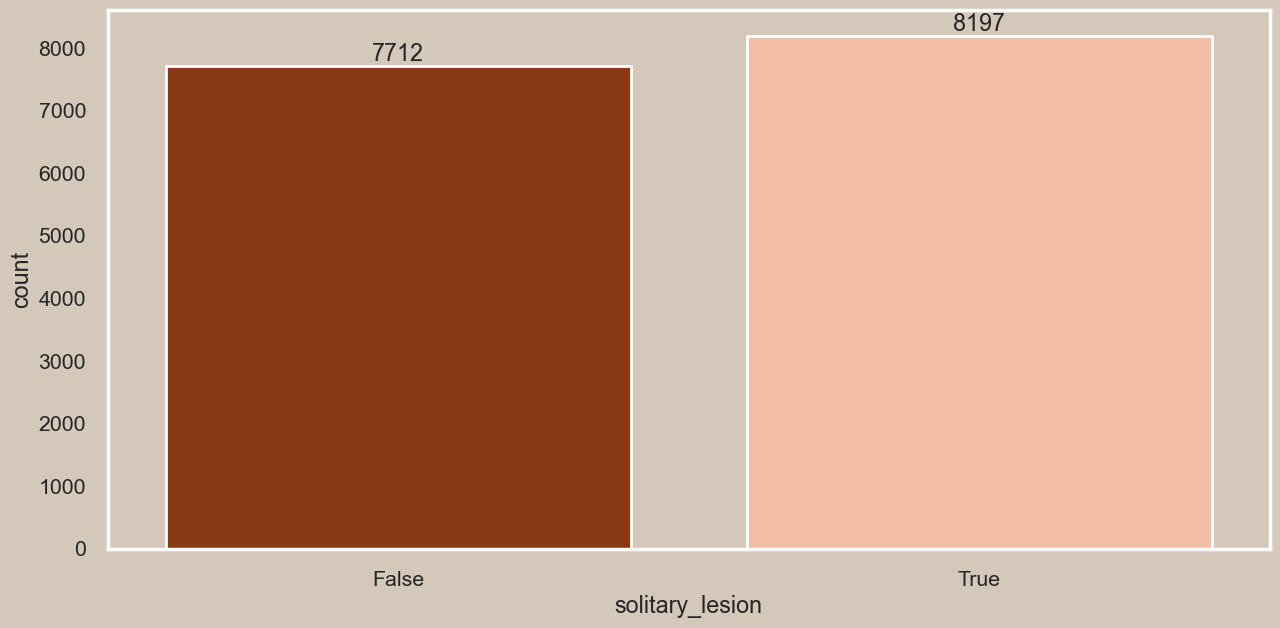

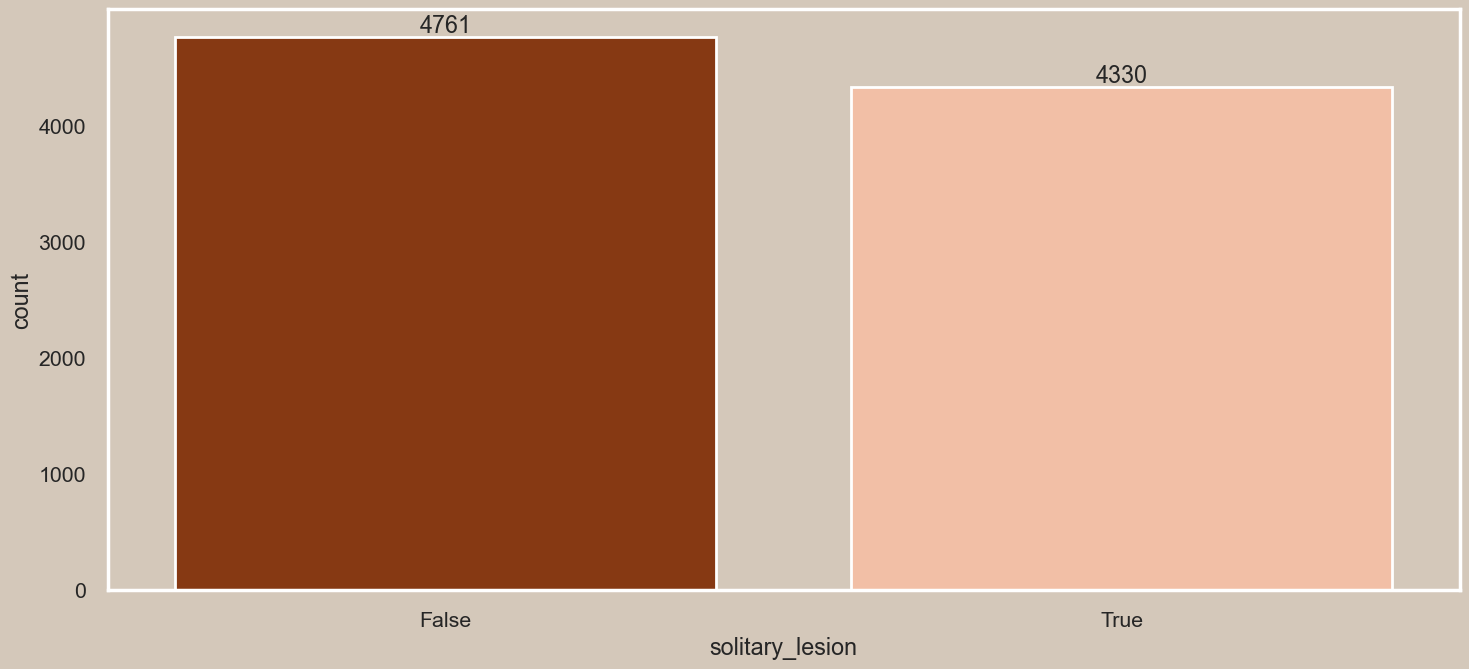

In [24]:
palette = ['#993300', '#ffbb99']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='solitary_lesion', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/solitary_lesion_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='solitary_lesion', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/solitary_lesion_neg.png", dpi=300)
plt.show()

#### `Swollen Tonsils`: A very brief majority of monkey pox patients suffers from swollen tonsils 

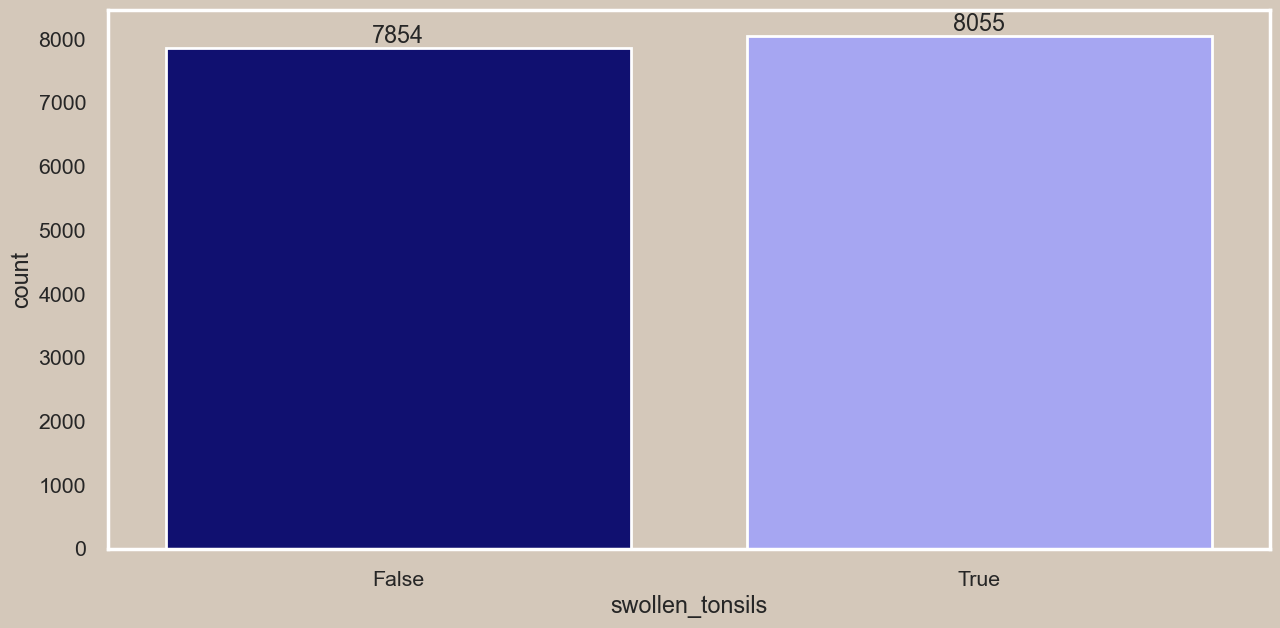

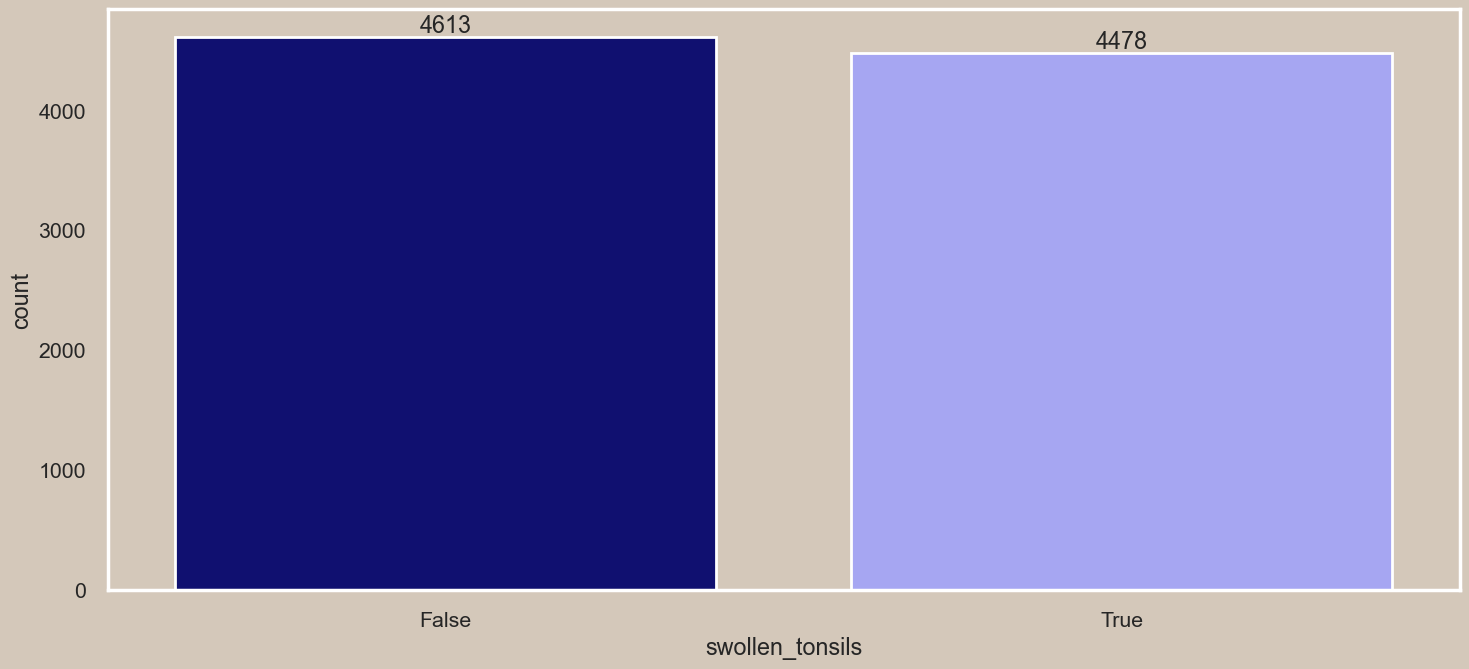

In [25]:
palette =['#000080', '#9999ff']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='swollen_tonsils', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/swollen_tonsils_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='swollen_tonsils', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/swollen_tonsils_neg.png", dpi=300)
plt.show()

#### `HIV Infection`: A very notable majority of monkey pox patients have also tested positive for HIV

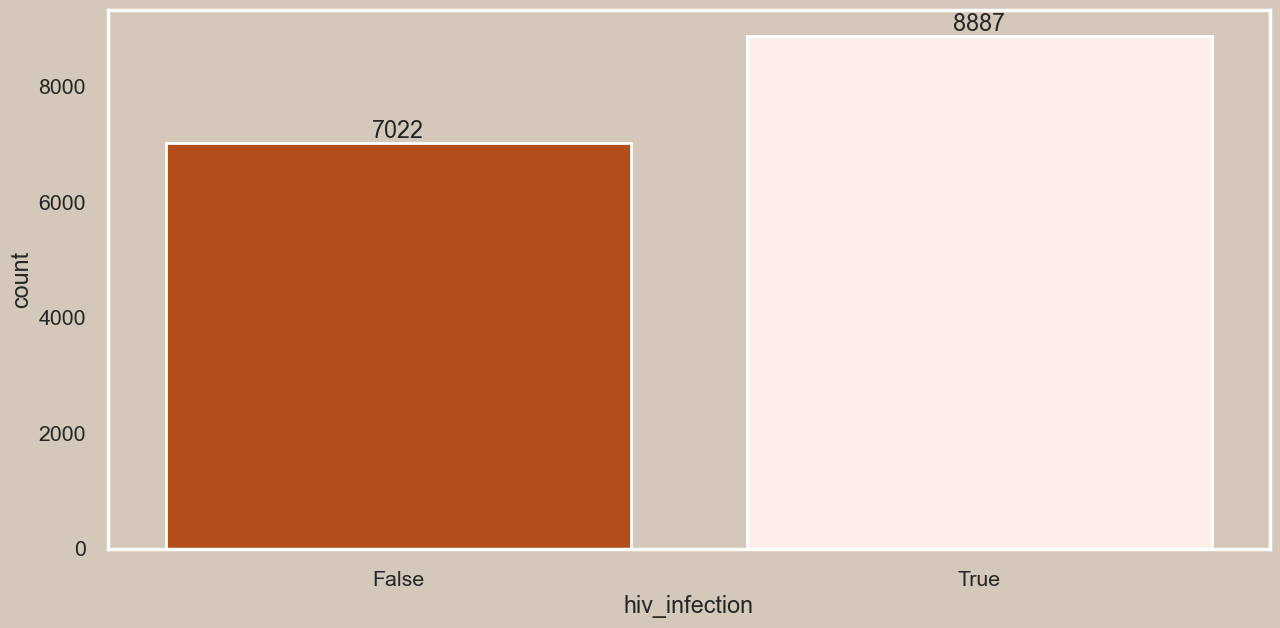

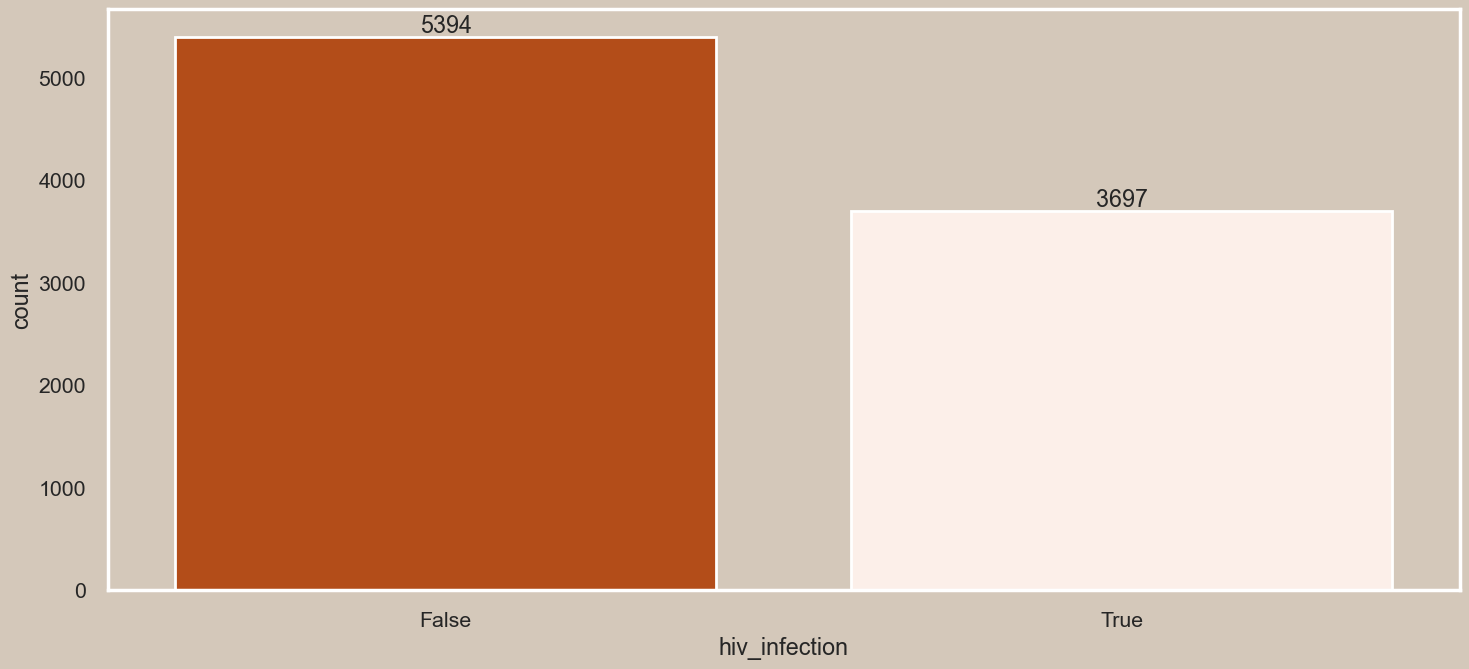

In [26]:
palette = ['#cc4400', '#ffeee6']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='hiv_infection', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/hiv_infection_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='hiv_infection', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/hiv_infection_neg.png", dpi=300)
plt.show()

#### `Sexually Transmitted Infection`: An equally notable majority of the patients has tested positive for sexually transmitted infections in general

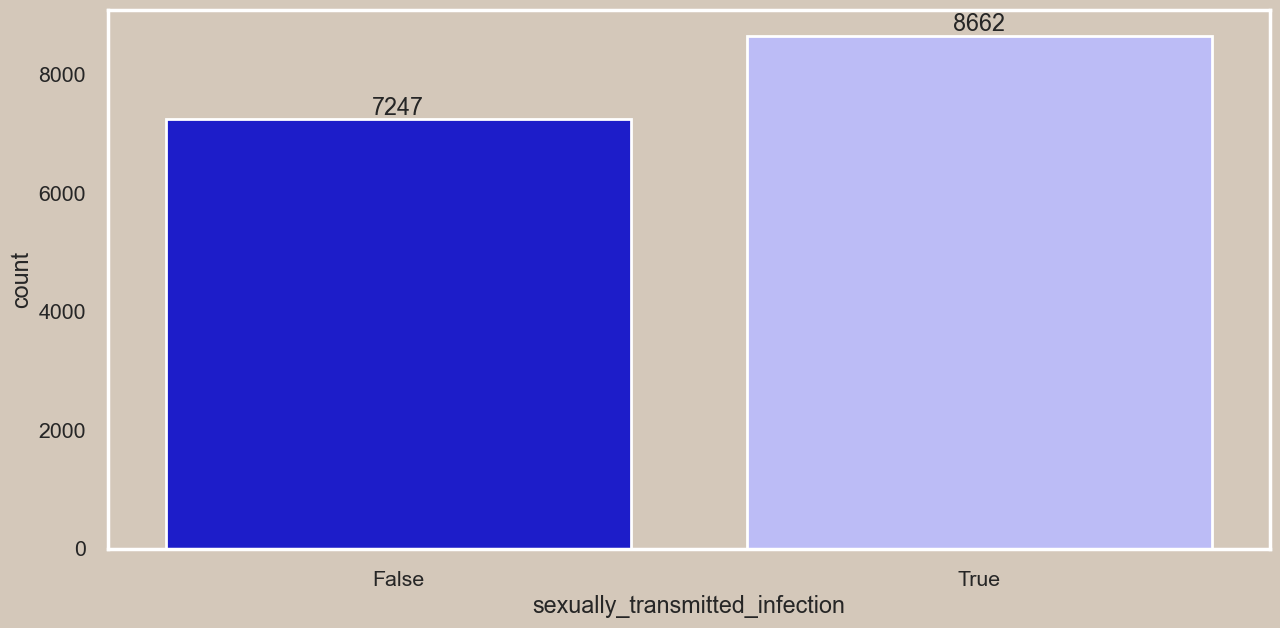

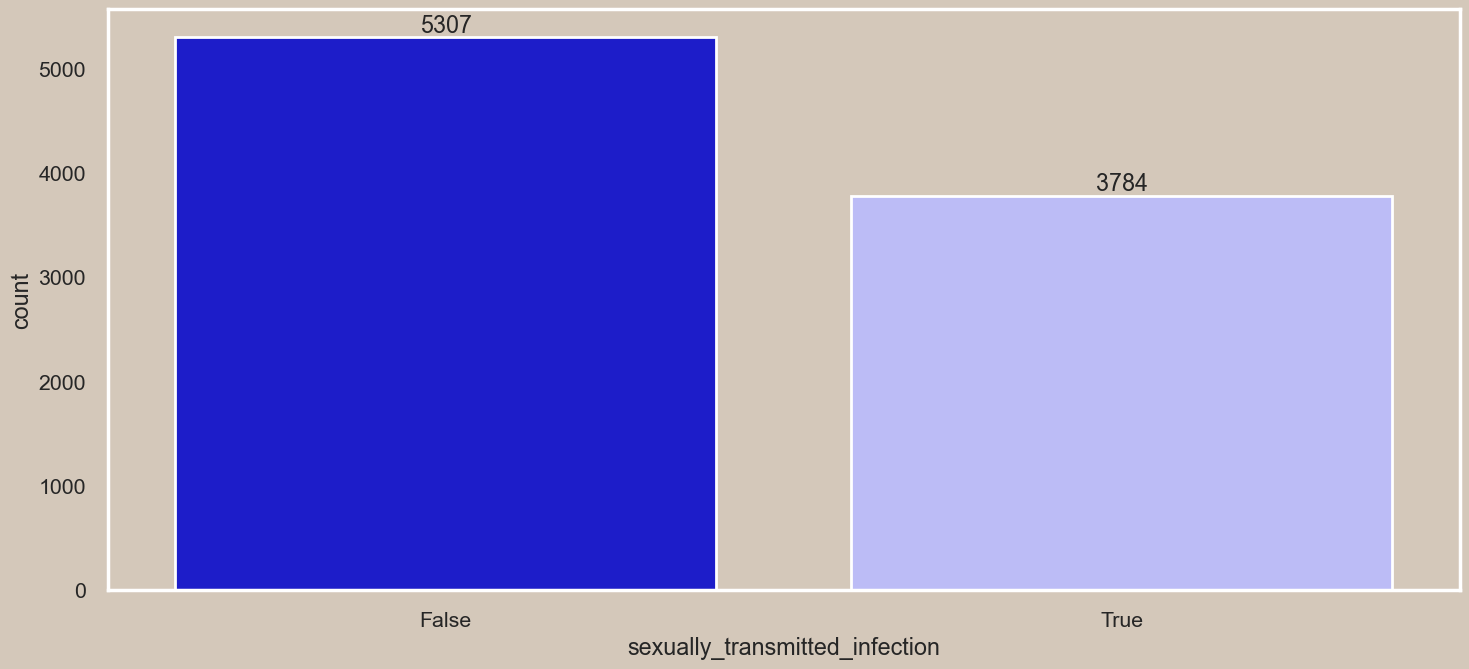

In [28]:
palette = ['#0000e6', '#b3b3ff']
fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='sexually_transmitted_infection', data=positive, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.savefig("../plots/sexually_transmitted_infection_pos.png", dpi=300)

fig, ax = plt.subplots(figsize=(15,7))
sx = sns.countplot(x='sexually_transmitted_infection', data=negative, palette=palette)
sx.grid(axis='y')
sx.bar_label(sx.containers[0], label_type='edge')
plt.tight_layout()
plt.savefig("../plots/sexually_transmitted_infection_neg.png", dpi=300)
plt.show()